#### Health Insurance Cost Prediction
    Health insurance is a type of insurance product that specifically guarantees the health costs or care of the insurance members if they fall ill or have an accident. Broadly speaking, there are two types of treatments offered by insurance companies, namely inpatient (in-patient treatment) and outpatient (out-patient treatment).


https://www.kaggle.com/annetxu/health-insurance-cost-prediction

    i have data like some lables those are having the Numerical and Categorical data points such as 
1.Numerical: age, bmi, children, charges.
2.Categorical: sex,smoker,region..
for creating the ML model we should convert categorical lables into numerical.

In [3]:
# loading data into notebook
import pandas as pd
import seaborn as sns # for visualization
df = pd.read_csv('insurance.csv')
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
# info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
# finding the null values.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# description of data.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


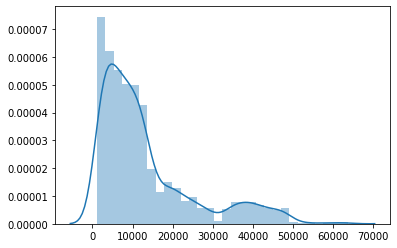

In [7]:
# data visualization.
sns.distplot(df[['charges']])


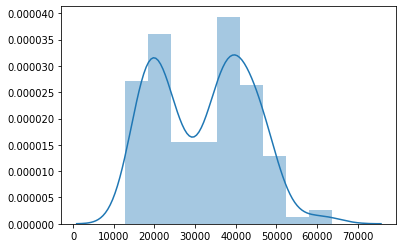

In [8]:
sns.distplot(df.loc[df.smoker == 'yes']['charges'].values.tolist())

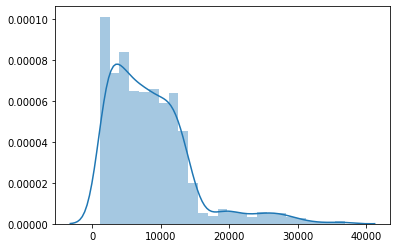

In [9]:
sns.distplot(df.loc[df.smoker == 'no']['charges'].values.tolist())

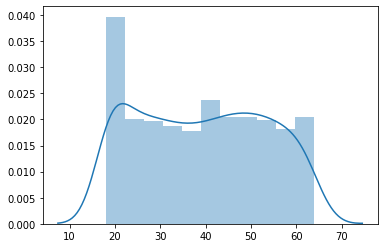

In [10]:
sns.distplot(df[['age']])



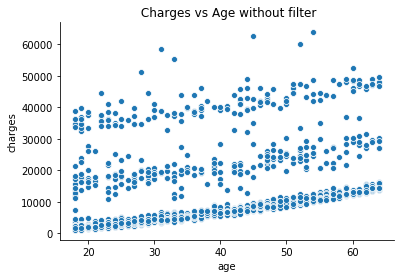

In [11]:
sns.scatterplot(x= df['age'] , y= df['charges']).set_title(' Charges vs Age without filter')
sns.despine()

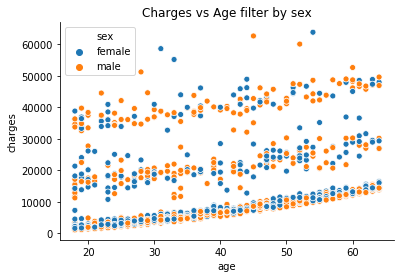

In [12]:
sns.scatterplot(x= df['age'] , y= df['charges'], hue='sex', data=df).set_title('Charges vs Age filter by sex')
sns.despine()

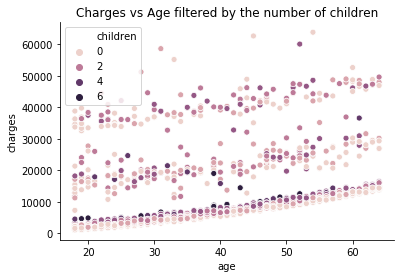

In [13]:
sns.scatterplot(x= df['age'] , y= df['charges'], hue='children', data=df).set_title('Charges vs Age filtered by the number of children')
sns.despine()

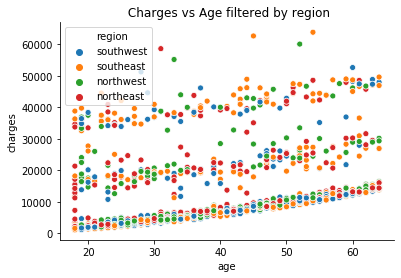

In [14]:
sns.scatterplot(x= df['age'] , y= df['charges'], hue='region', data=df).set_title(' Charges vs Age filtered by region')
sns.despine()

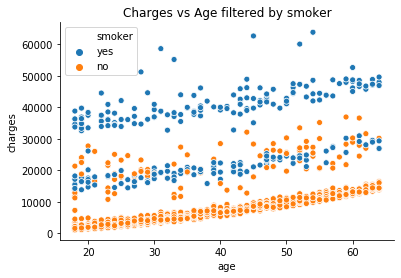

In [15]:
sns.scatterplot(x= df['age'] , y= df['charges'], hue='smoker', data=df).set_title('Charges vs Age filtered by smoker')
sns.despine()

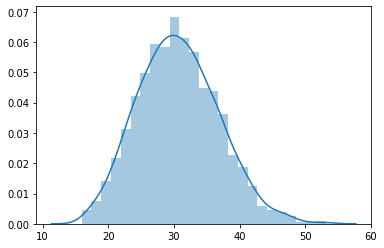

In [16]:
sns.distplot(df[['bmi']])

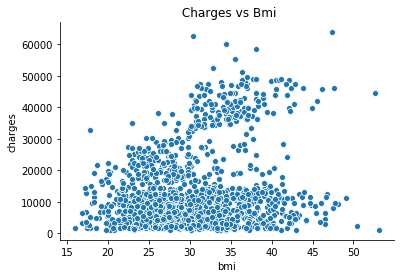

In [17]:
sns.scatterplot(x= df['bmi'] , y= df['charges']).set_title(' Charges vs Bmi')
sns.despine()

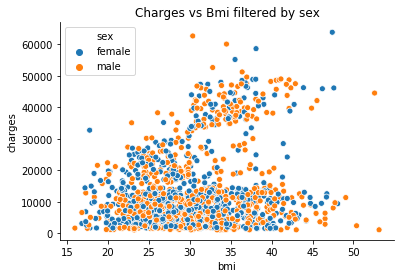

In [18]:
sns.scatterplot(x= df['bmi'] , y= df['charges'], hue='sex', data=df).set_title('Charges vs Bmi filtered by sex')
sns.despine()

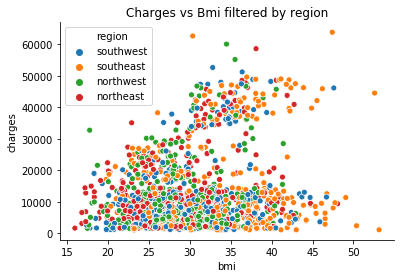

In [19]:
sns.scatterplot(x= df['bmi'] , y= df['charges'], hue='region', data=df).set_title('Charges vs Bmi filtered by region')
sns.despine()

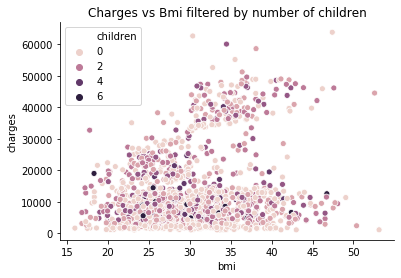

In [20]:
sns.scatterplot(x= df['bmi'] , y= df['charges'], hue='children', data=df).set_title('Charges vs Bmi filtered by number of children')
sns.despine()

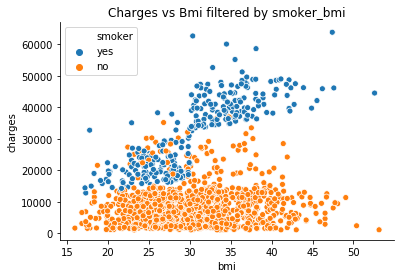

In [21]:
sns.scatterplot(x= df['bmi'] , y= df['charges'], hue='smoker', data=df).set_title('Charges vs Bmi filtered by smoker_bmi')
sns.despine()

### one hot and label encoding technics.
to create the ML model we should change Categorical to numerical data for i have choise one hot and label encoding 

In [22]:
# one hot encoding on sex lables. using pandas
df['sex'] = pd.get_dummies(df['sex'])

In [23]:
# one hot encoding on smoker lables. using pandas
df['smoker'] = pd.get_dummies(df['smoker'])

In [24]:
# after that check the dataset shape 
df.shape

(1338, 7)

In [29]:
#label encoding 

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['region']= LE.fit_transform(df['region'])

# cleaned dataset 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,3,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520


In [26]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#columns = ['age','sex','bmi','children','smoker','region',]
#df[columns] = sc.fit_transform(df[columns])

In [30]:
# here y is dependent or target variable 
y = df['charges']
# independent
x = df.drop('charges',axis=1)

In [31]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

here most important step is that creating Model for cost predictions using Machine learning algoritms such as 
    1. LinearRegression
    2. DecisionTreeRegressor
    3. RandomForestRegressor

In [32]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)
lpred = lr.predict(x)
lr.score(x,y)

0.7507372027994939

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x,y)
dtrpred = dtr.predict(x)
dtr.score(x,y)

0.998667156135576

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x,y)
rfrpred = rfr.predict(x)
rfr.score(x,y)

/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9683237011300468

#### Conclusion:
After creating the models i got results as srore for all and then i was compared score of three model from those RandomForestRegressor was given good score for this dataset then i created deployment for model in flask to heroku.
https://healthinsurancecostprediction.herokuapp.com